# Transfer Learning CIFAR10

* Train a simple convnet on the CIFAR dataset the first 5 output classes [0..4].
* Freeze convolutional layers and fine-tune dense layers for the last 5 ouput classes [5..9].


### 1. Import CIFAR10 data and create 2 datasets with one dataset having classes from 0 to 4 and other having classes from 5 to 9 

In [0]:
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [0]:
from keras.backend import backend
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Label: [7]


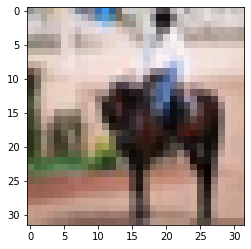

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[11]))
plt.imshow(X_train[11], cmap='gray')

In [36]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]])

In [37]:
X_train.shape

(50000, 32, 32, 3)

In [38]:
y_train.shape

(50000, 1)

In [39]:
y_train[0]

array([6])

In [40]:
y_train[0].shape

(1,)

In [49]:
type(y_train[0])

numpy.ndarray

In [50]:
type(y_train)

numpy.ndarray

In [0]:
import numpy as np

In [0]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [61]:
type(y_train[0])

numpy.int64

In [0]:
xtrain1 = X_train[y_train < 5]
xtrain2 = X_train[y_train >= 5]
xtest1 = X_test[y_test < 5]
xtest2 = X_test[y_test >= 5]

In [0]:
ytrain1 = y_train[y_train < 5]
ytrain2 = y_train[y_train >= 5]
ytest1 = y_test[y_test < 5]
ytest2 = y_test[y_test >= 5]

### 2. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [66]:
xtrain1.shape

(25000, 32, 32, 3)

In [67]:
xtrain2.shape

(25000, 32, 32, 3)

In [68]:
xtest1.shape

(5000, 32, 32, 3)

In [69]:
xtest2.shape

(5000, 32, 32, 3)

In [72]:
ytrain1[0:10]

array([4, 1, 1, 2, 3, 4, 2, 3, 2, 4])

In [73]:
ytrain2[0:10]

array([6, 9, 9, 7, 8, 7, 7, 9, 9, 9])

In [121]:
xtrain1[0]

array([[[0.10980392, 0.09803922, 0.03921569],
        [0.14509805, 0.13333334, 0.07450981],
        [0.14901961, 0.13725491, 0.07843138],
        ...,
        [0.29803923, 0.2627451 , 0.15294118],
        [0.31764707, 0.28235295, 0.16862746],
        [0.33333334, 0.29803923, 0.18431373]],

       [[0.12941177, 0.10980392, 0.05098039],
        [0.13333334, 0.11764706, 0.05490196],
        [0.1254902 , 0.10588235, 0.04705882],
        ...,
        [0.37254903, 0.32156864, 0.21568628],
        [0.3764706 , 0.32156864, 0.21960784],
        [0.33333334, 0.28235295, 0.1764706 ]],

       [[0.15294118, 0.1254902 , 0.05882353],
        [0.15686275, 0.12941177, 0.06666667],
        [0.22352941, 0.19607843, 0.12941177],
        ...,
        [0.3647059 , 0.29803923, 0.20392157],
        [0.41960785, 0.34901962, 0.25882354],
        [0.37254903, 0.3019608 , 0.21176471]],

       ...,

       [[0.3254902 , 0.28627452, 0.20392157],
        [0.34117648, 0.3019608 , 0.21960784],
        [0.32941177, 0

In [0]:
xtrain1 = xtrain1.astype('float32')
xtest1 = xtest1.astype('float32')
xtrain1 /= 255
xtest1 /= 255

In [80]:
print(ytrain1[0])

4


In [0]:
import keras
ytrain1 = keras.utils.to_categorical(ytrain1, 5)
ytest1 = keras.utils.to_categorical(ytest1, 5)

In [94]:
print(ytrain1[0])

[0. 0. 0. 0. 1.]


In [101]:
xtrain1.shape

(25000, 32, 32, 3)

### 3. Build a sequential neural network model which can classify the classes 0 to 4 of CIFAR10 dataset with at least 80% accuracy on test data

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
 
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32, 32, 3),name='conv_1'))
model.add(Conv2D(100, kernel_size=(3, 3), activation='relu',kernel_initializer='he_uniform',padding='same',name='conv_2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))
model.add(Dropout(0.2,name='drop_1'))
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same',name='conv_3'))
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same',name='conv_4'))
model.add(MaxPooling2D(pool_size=(2, 2),name='max_2'))
model.add(Dropout(0.2,name='drop_2'))
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same',name='conv_5'))
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same',name='conv_6'))
model.add(MaxPooling2D(pool_size=(2, 2),name='max_3'))
model.add(Dropout(0.2,name='drop_3'))

In [0]:
model.add(Flatten())
model.add(Dense(400, activation='relu',name='dense_1'))
model.add(Dropout(0.2,name='drop_4'))
model.add(Dense(200, activation='relu',name='dense_2'))
model.add(Dropout(0.3,name='drop_5'))
model.add(Dense(5, activation='softmax',name='dense_3'))

In [0]:
from keras.losses import categorical_crossentropy
from keras import optimizers
#model.compile(loss= "categorical_crossentropy",optimizer='sgd',metrics=['accuracy'])
opt = optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [182]:
model.fit(xtrain1, ytrain1,batch_size=30,epochs=20,verbose=1,validation_data=(xtest1, ytest1))

Train on 25000 samples, validate on 5000 samples
Epoch 1/20
25000/25000 [==============================] - 11s 422us/step - loss: 1.2617 - acc: 0.4538 - val_loss: 0.9729 - val_acc: 0.5836
Epoch 2/20
25000/25000 [==============================] - 8s 335us/step - loss: 0.9511 - acc: 0.6085 - val_loss: 0.8179 - val_acc: 0.6740
Epoch 3/20
25000/25000 [==============================] - 8s 335us/step - loss: 0.8097 - acc: 0.6818 - val_loss: 0.7572 - val_acc: 0.7014
Epoch 4/20
25000/25000 [==============================] - 8s 331us/step - loss: 0.7210 - acc: 0.7193 - val_loss: 0.6908 - val_acc: 0.7340
Epoch 5/20
25000/25000 [==============================] - 8s 333us/step - loss: 0.6474 - acc: 0.7523 - val_loss: 0.6036 - val_acc: 0.7694
Epoch 6/20
25000/25000 [==============================] - 8s 329us/step - loss: 0.5932 - acc: 0.7776 - val_loss: 0.5479 - val_acc: 0.7908
Epoch 7/20
25000/25000 [==============================] - 8s 331us/step - loss: 0.5357 - acc: 0.8005 - val_loss: 0.5396 - 

In [183]:
score = model.evaluate(xtest1, ytest1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

5000/5000 [==============================] - 1s 120us/step
Test loss: 0.4508796021461487
Test accuracy: 0.8552


### 4. In the model which was built above (for classification of classes 0-4 in CIFAR10), make only the dense layers to be trainable and conv layers to be non-trainable

In [184]:
for layer in model.layers:
  if('dense' not in layer.name): 
    layer.trainable = False

from termcolor import colored

for layer in model.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

conv_1
False
conv_2
False
max_1
False
drop_1
False
conv_3
False
conv_4
False
max_2
False
drop_2
False
conv_5
False
conv_6
False
max_3
False
drop_3
False
flatten_14
False
dense_1
True
drop_4
False
dense_2
True
drop_5
False
dense_3
True


### 5. Utilize the the model trained on CIFAR 10 (classes 0 to 4) to classify the classes 5 to 9 of CIFAR 10  (Use Transfer Learning) <br>
Achieve an accuracy of more than 85% on test data

In [190]:
print(ytrain2[0:10])

[6 9 9 7 8 7 7 9 9 9]


In [0]:
ytrain2 = ytrain2 - 5
ytest2 = ytest2 - 5

In [192]:
print(ytrain2[0:10])

[1 4 4 2 3 2 2 4 4 4]


In [0]:
xtrain2 = xtrain2.astype('float32')
xtest2 = xtest2.astype('float32')

xtrain2 /= 255
xtest2 /= 255

In [194]:
print(ytrain2[0])

1


In [0]:
ytrain2 = keras.utils.to_categorical(ytrain2, 5)
ytest2 = keras.utils.to_categorical(ytest2, 5)

In [196]:
print(ytrain2[0])

[0. 1. 0. 0. 0.]


In [0]:
from keras.models import Model 
x = model.output
#x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(128, activation="relu")(x)
x = Dense(32, activation="relu")(x)
predictions = Dense(5, activation="softmax")(x)

model_final = Model(input = model.input, output = predictions)
opt = optimizers.SGD(lr=0.01, momentum=0.9)
model_final.compile(loss = "categorical_crossentropy", optimizer = opt, metrics=["accuracy"])

In [198]:
model_final.fit(xtrain2, ytrain2,batch_size=128,epochs=20,verbose=1,validation_data=(xtest2, ytest2))

Train on 25000 samples, validate on 5000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 180us/step - loss: 1.1906 - acc: 0.5560 - val_loss: 0.8626 - val_acc: 0.6614
Epoch 2/20
25000/25000 [==============================] - 2s 97us/step - loss: 0.7879 - acc: 0.7093 - val_loss: 0.6243 - val_acc: 0.7822
Epoch 3/20
25000/25000 [==============================] - 2s 98us/step - loss: 0.6378 - acc: 0.7723 - val_loss: 0.5378 - val_acc: 0.8122
Epoch 4/20
25000/25000 [==============================] - 2s 97us/step - loss: 0.5793 - acc: 0.7968 - val_loss: 0.5012 - val_acc: 0.8272
Epoch 5/20
25000/25000 [==============================] - 2s 96us/step - loss: 0.5448 - acc: 0.8038 - val_loss: 0.4799 - val_acc: 0.8286
Epoch 6/20
25000/25000 [==============================] - 2s 96us/step - loss: 0.5092 - acc: 0.8200 - val_loss: 0.4685 - val_acc: 0.8360
Epoch 7/20
25000/25000 [==============================] - 2s 96us/step - loss: 0.4942 - acc: 0.8242 - val_loss: 0.4515 - val_acc

In [199]:
score = model_final.evaluate(xtest2, ytest2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

5000/5000 [==============================] - 1s 120us/step
Test loss: 0.4013867317199707
Test accuracy: 0.8646


# Text classification using TF-IDF

### 6. Load the dataset from sklearn.datasets

In [0]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [0]:
from sklearn.datasets import fetch_20newsgroups

In [0]:
train = fetch_20newsgroups(subset='train')

In [13]:
from pprint import pprint
pprint(list(train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [14]:
train.filenames.shape

(11314,)

In [15]:
train.filenames[0]

'/root/scikit_learn_data/20news_home/20news-bydate-train/rec.autos/102994'

In [16]:
train.target.shape

(11314,)

In [17]:
train.target[0]

7

In [20]:
train.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [0]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

### 7. Training data

In [0]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

### 8. Test data

In [0]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

###  a.  You can access the values for the target variable using .target attribute 
###  b. You can access the name of the class in the target variable with .target_names


In [33]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2])

In [34]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [35]:
twenty_train.data[0:5]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [36]:
twenty_train.target.shape

(2257,)

### 9.  Now with dependent and independent data available for both train and test datasets, using TfidfVectorizer fit and transform the training data and test data and get the tfidf features for both

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
vectorizer = TfidfVectorizer()
twenty_train1 = vectorizer.fit_transform(twenty_train.data)
twenty_test1 = vectorizer.transform(twenty_test.data)

In [73]:
twenty_train1.shape

(2257, 35788)

In [74]:
twenty_train.target.shape

(2257,)

In [75]:
twenty_test1.shape

(1502, 35788)

In [76]:
twenty_test.target.shape

(1502,)

### 10. Use logisticRegression with tfidf features as input and targets as output and train the model and report the train and test accuracy score

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
model1 = LogisticRegression()

In [79]:
model1.fit(twenty_train1, twenty_train.target)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predicted = model1.predict(twenty_test1)

In [0]:
expected = twenty_test.target

In [83]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(expected, predicted))
print(accuracy_score(expected,predicted))

[[240  16  15  48]
 [  2 376   6   5]
 [  3  47 341   5]
 [  4  14   5 375]]
0.8868175765645806
